In [1]:
from src import *
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

In [2]:
datasets = ['Abortion', 'Brexit', 'Election', 'Gun', 'Partisanship', 'Referendum_']
theta = 0.5

## EC \& ECC


In [2]:
# ec_ecc('figs/ec_ecc_dif', (100, 5, 620, 280))

## Joint Distribution

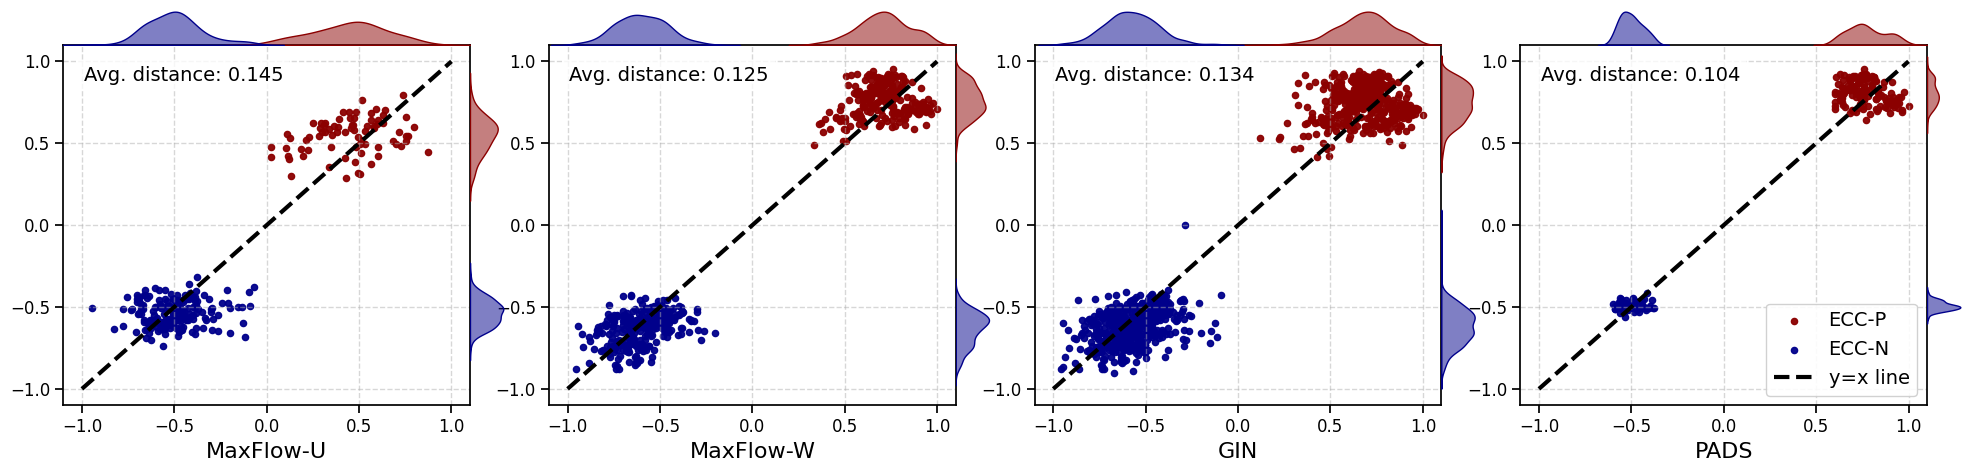

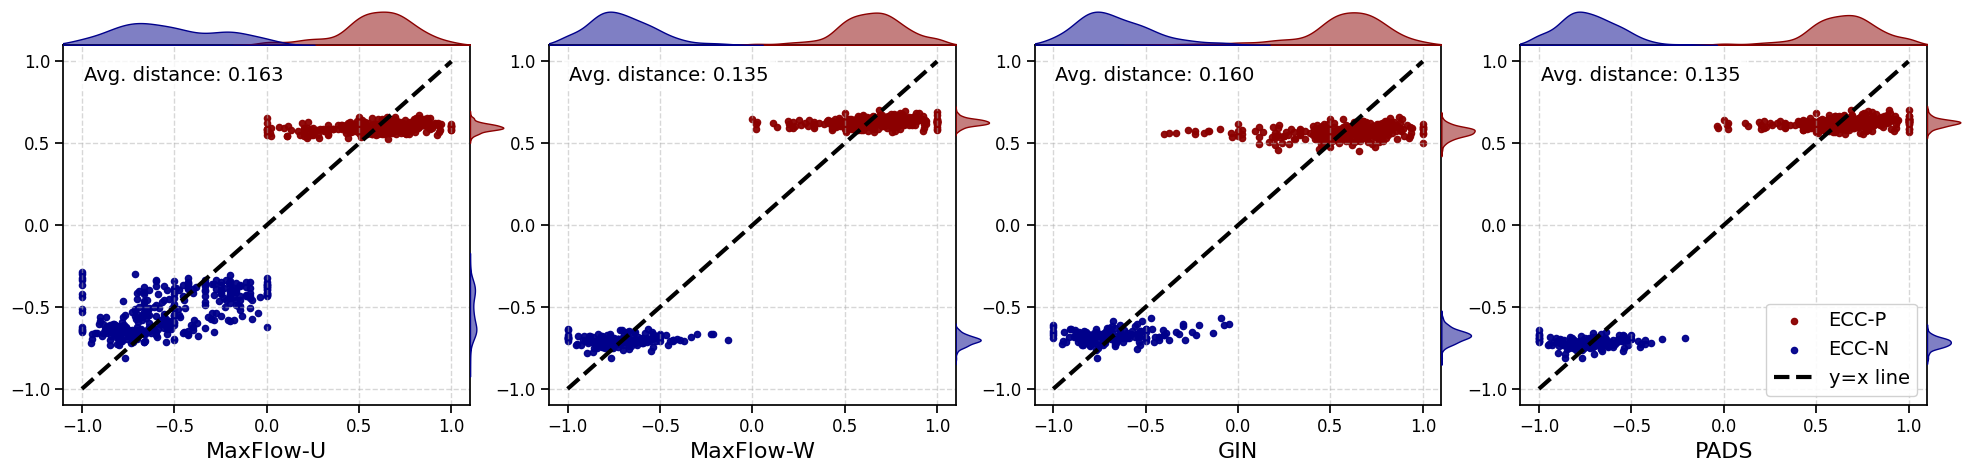

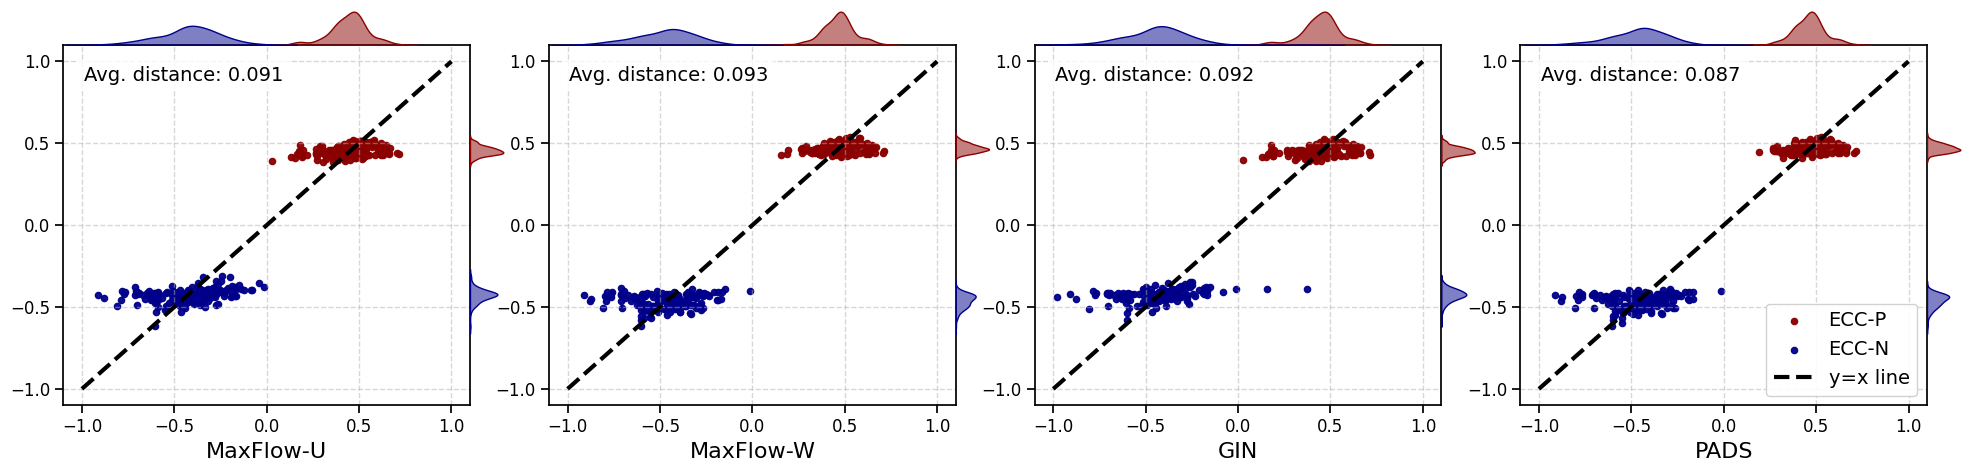

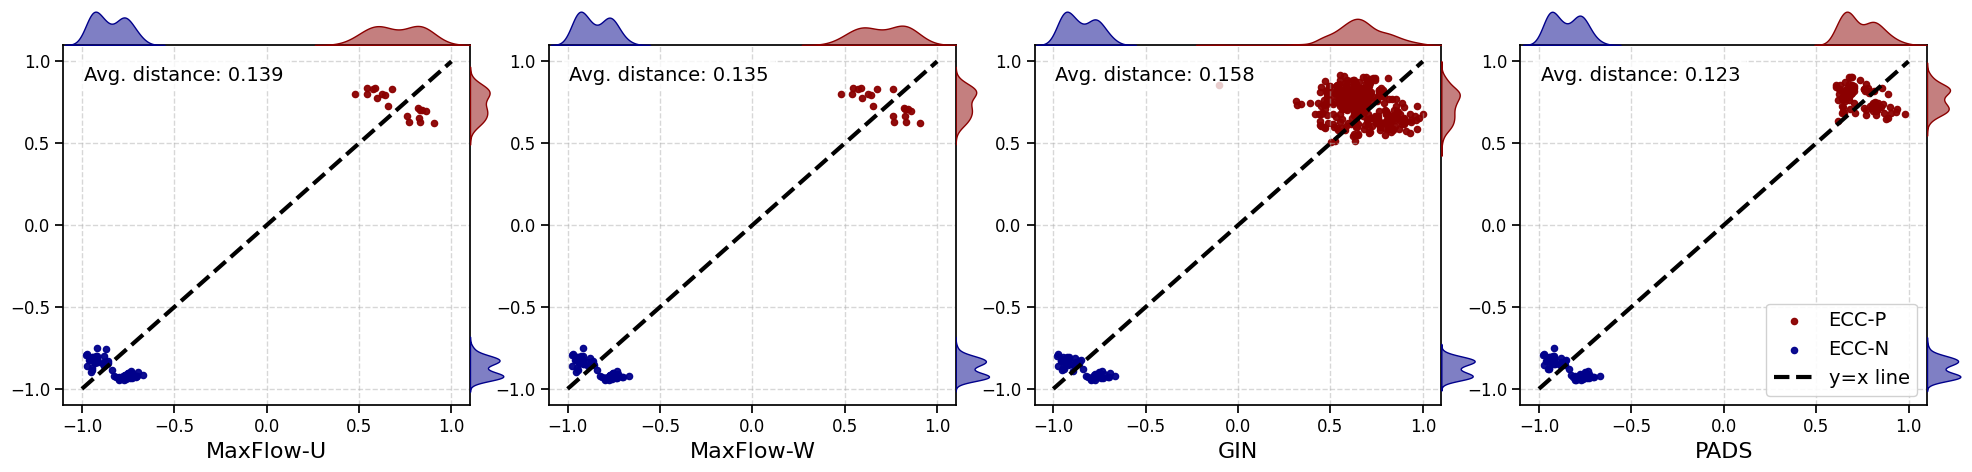

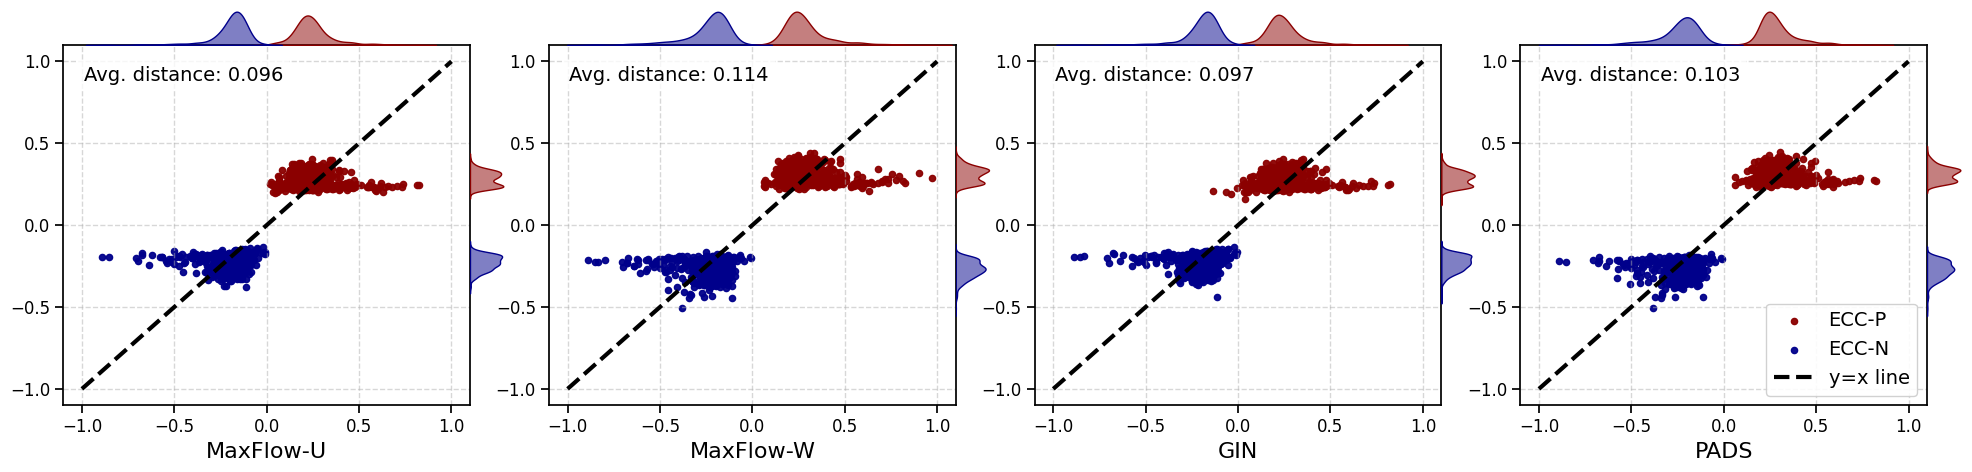

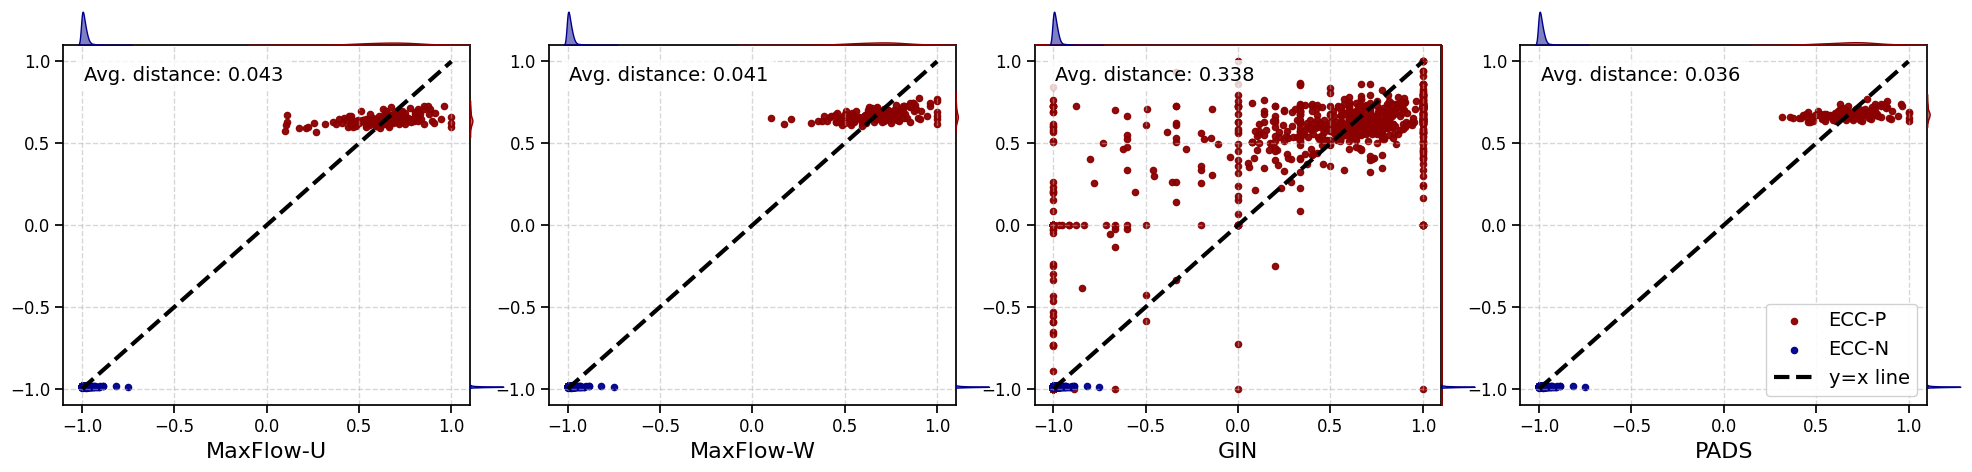

In [3]:
for d in datasets:
    joint_distribution(nx.read_gml(f'output/results-theta={theta}/{d}/graph.gml'), save_path=f'output/figs-theta={theta}/joint_distribution/{d}.pdf')

## Border

===Referendum_===


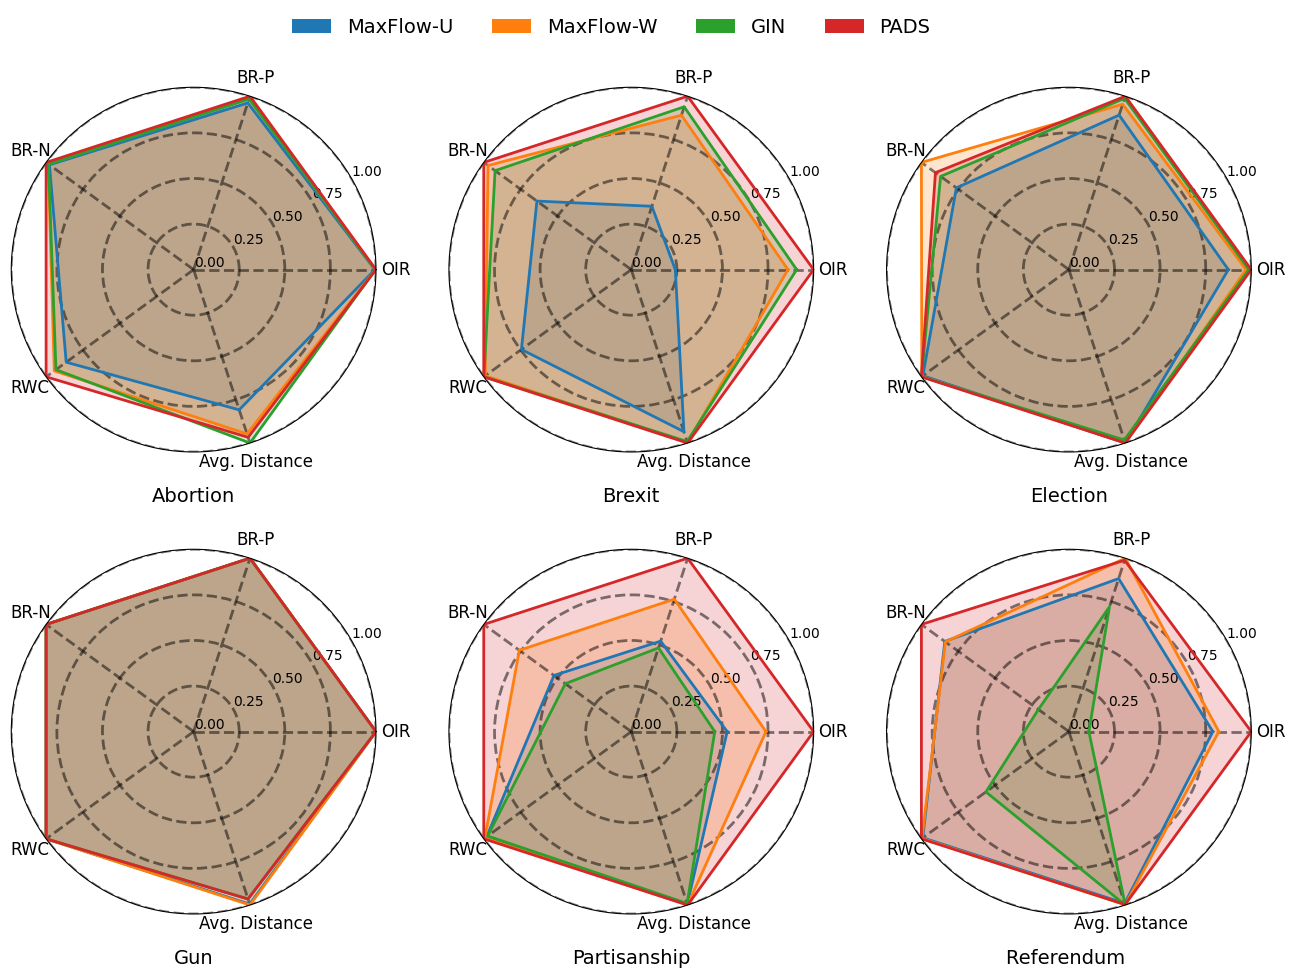

In [3]:
for d in datasets:
    print(f'==={d}===')
    border_stat(f'output/results-theta={theta}/{d}/graph.gml', save_path=f'output/figs-theta={theta}/border_statistics/{d}.csv')
radar_chart(file_path=f'output/figs-theta={theta}/border_statistics/', datasets=datasets)

## Diffusion

In [4]:
for d in datasets:
    my_diffusion(f'output/results-theta={theta}/{d}/graph.gml', f'output/figs-theta={theta}/heatmap/{d}.json')

Processing negative nodes: 100%|██████████| 402/402 [00:00<00:00, 891.38it/s]


In [6]:
# Initialize the results DataFrame with proper dtypes
results_df = pd.DataFrame(columns=['dataset', 'method', 'popm', 'ponm', 'nopm', 'nonm'])
# Initialize empty DataFrame with correct dtypes
results_df = pd.DataFrame({col: pd.Series(dtype=dtype) for col, dtype in {'dataset': str,
    'method': str, 'popm': float, 'ponm': float, 'nopm': float, 'nonm': float}.items()})
for d in datasets:
    print(f'==={d}===')
    for m in ['maxflow_cpp_udsp', 'maxflow_cpp_wdsp', 'node2vec_gin', 'pads_cpp']:
        popm, ponm, nopm, nonm = mean_diffusion(f'output/results-theta={theta}/{d}/graph.gml', f'output/figs-theta={theta}/heatmap/{d}.json', m, filter=False)
        results_df.loc[len(results_df)] = {'dataset': d, 'method': m, 'popm': popm,
            'ponm': ponm, 'nopm': nopm, 'nonm': nonm}
results_df.to_csv(f'output/figs-theta={theta}/heatmap/reachability.csv', index=False)

===Abortion===
maxflow_cpp_udsp: popm(0.1504191782980446), ponm(0.0031306222291578143), nonpm(0.001049491246843379), nonpm(0.10716234940144154)
maxflow_cpp_wdsp: popm(0.06666058732826659), ponm(0.0007355344291415214), nonpm(0.0001331744661177722), nonpm(0.07028909822983405)
node2vec_gin: popm(0.036695446285369304), ponm(0.0003652624809607343), nonpm(8.465855720329452e-05), nonpm(0.03941923075188033)
pads_cpp: popm(0.04503866896050084), ponm(9.908733396373992e-05), nonpm(0.00019203350701542586), nonpm(0.2257428112038418)
===Brexit===
maxflow_cpp_udsp: popm(0.8582614655684584), ponm(0.21568415777632874), nonpm(0.007542675096955539), nonpm(0.22303913040750725)
maxflow_cpp_wdsp: popm(0.8577050930549389), ponm(0.10608044567334755), nonpm(0.005587796056558485), nonpm(0.4498948572875357)
node2vec_gin: popm(0.863090437526161), ponm(0.12265019056133887), nonpm(0.005909526342824758), nonpm(0.43204529953807)
pads_cpp: popm(0.8402899502554029), ponm(0.10032859320766924), nonpm(0.004515747282149806

===Abortion===
===Brexit===
===Election===
===Gun===
===Partisanship===
===Referendum_===


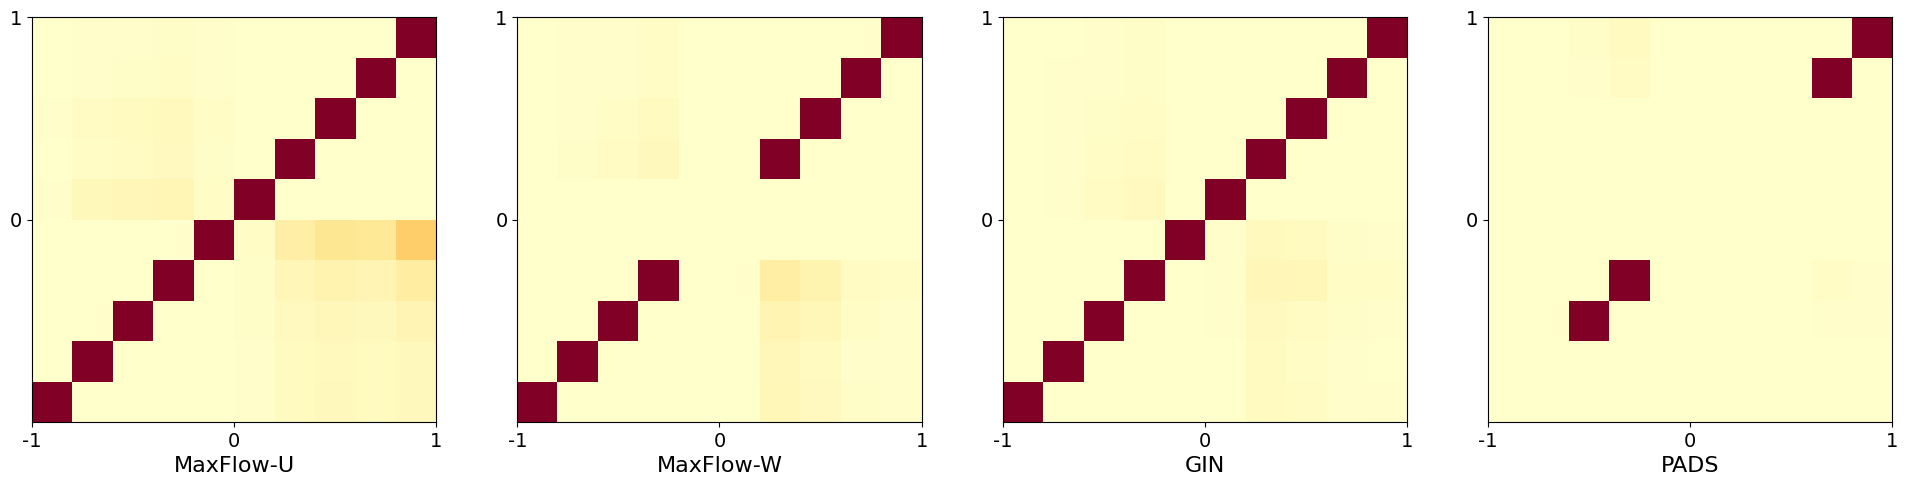

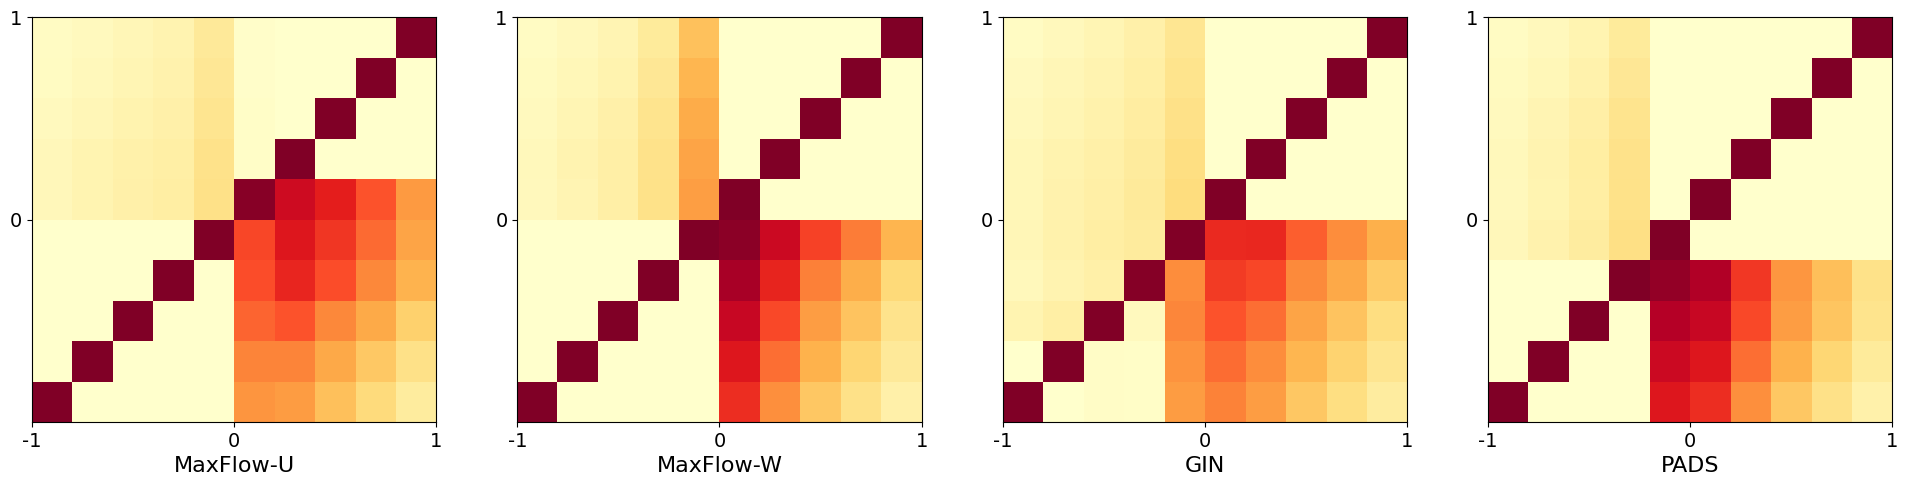

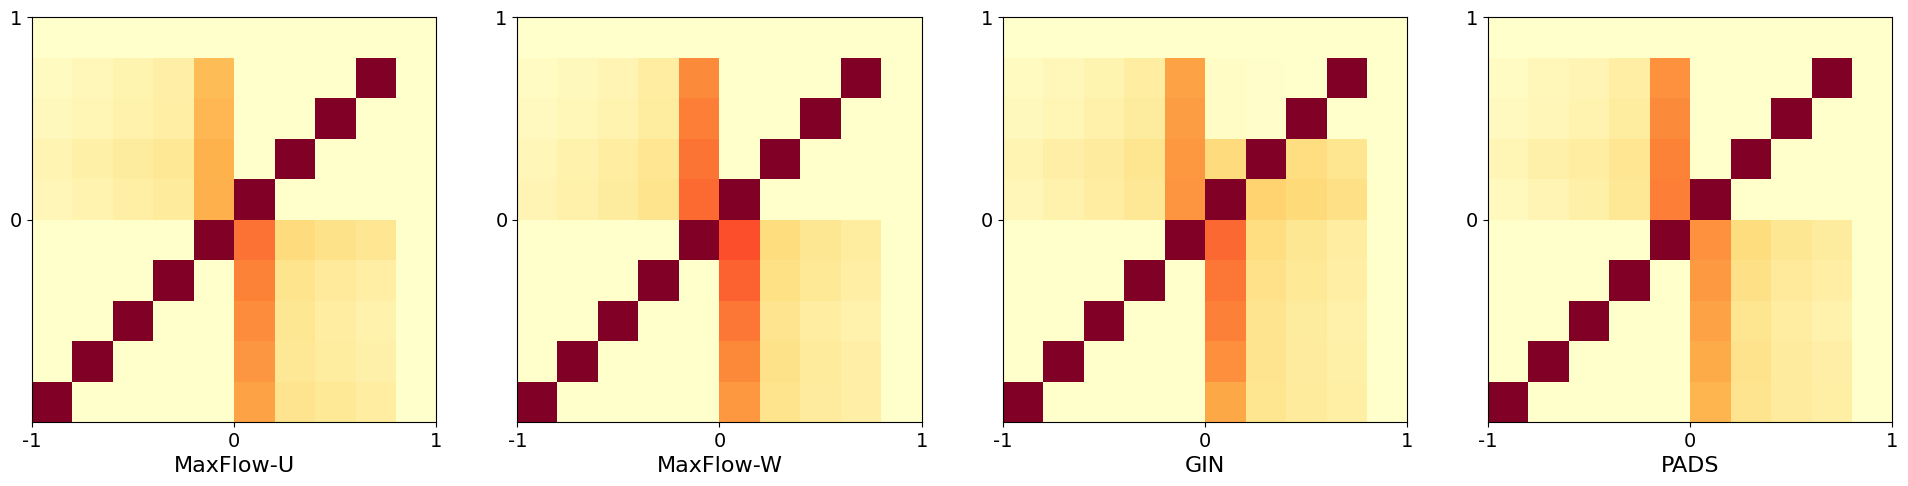

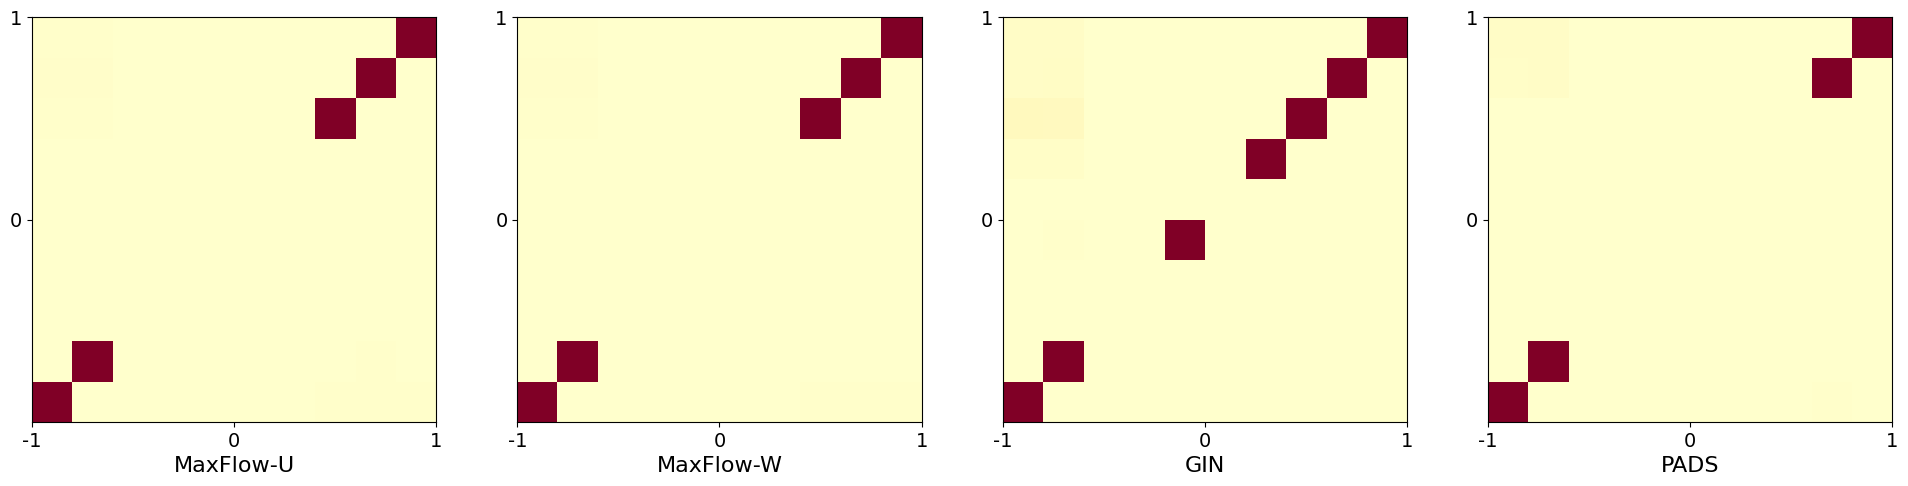

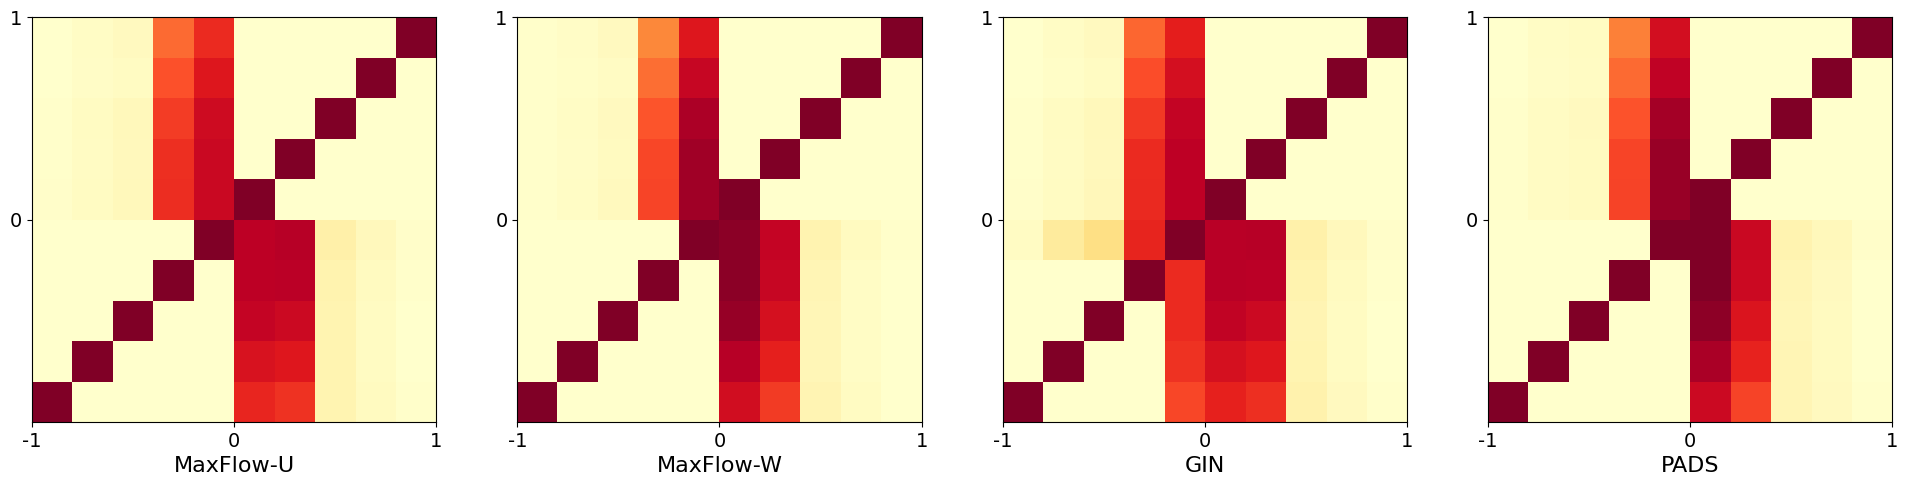

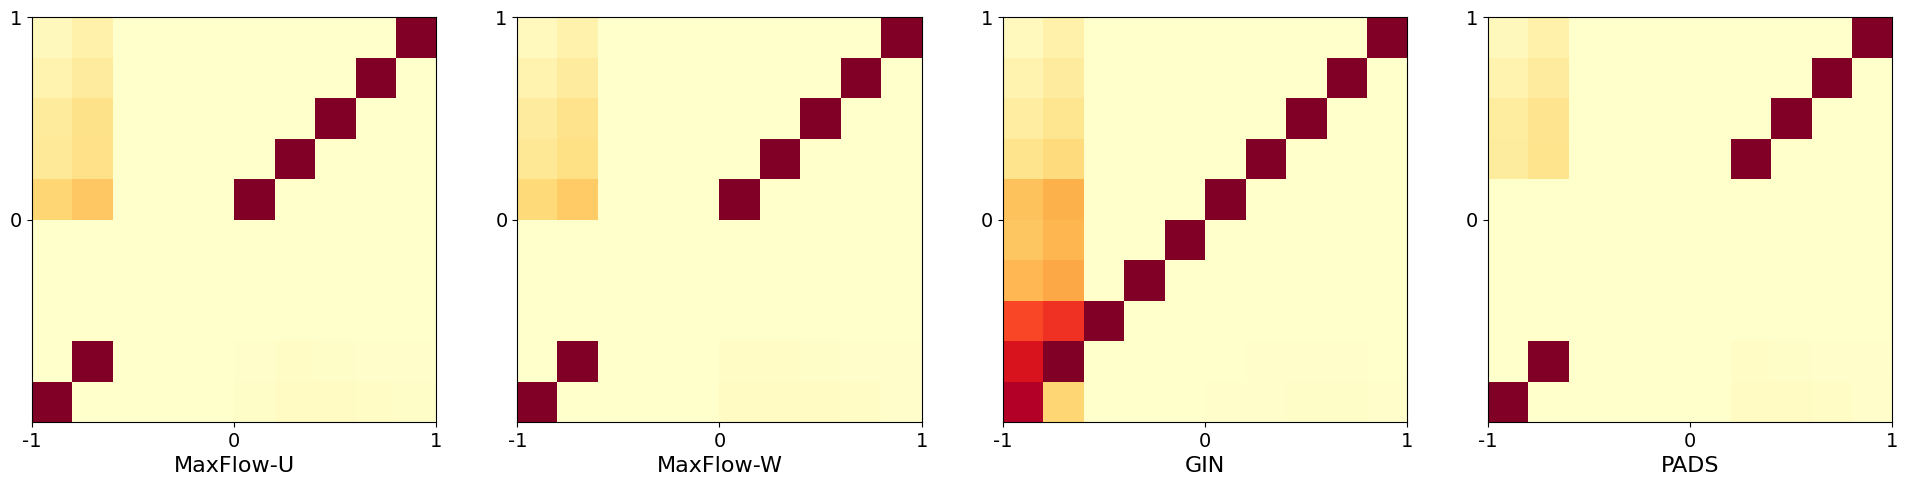

In [7]:
for d in datasets:
    print(f'==={d}===')
    create_heatmap(f'output/results-theta={theta}/{d}/graph.gml', f'output/figs-theta={theta}/heatmap/{d}.json', save_path=f'output/figs-theta={theta}/heatmap/{d}.pdf')

## F curve

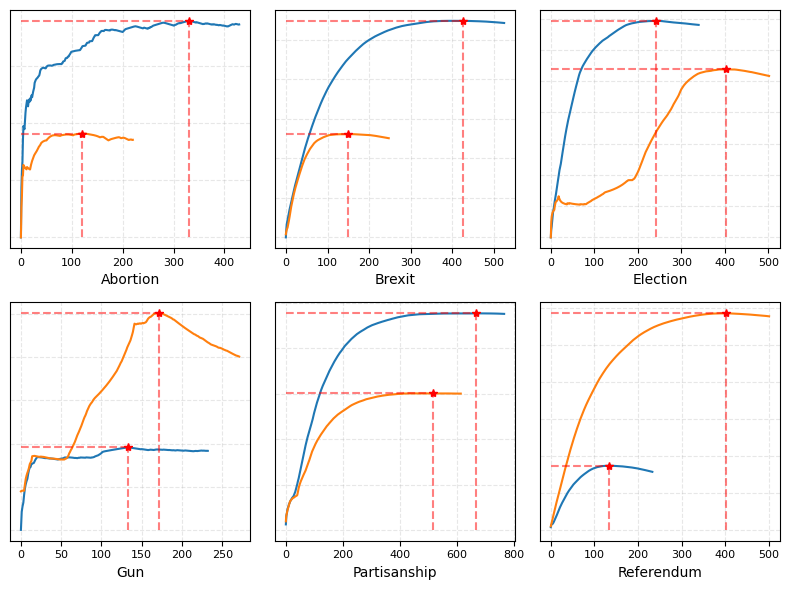

In [3]:
fs_curve(datasets, theta=theta, save_path=f'output/figs-theta={theta}/fs_curve/fs.pdf', max_neg=100)

## Theta Influence

===Partisanship===
=== Time Consumption ===
{0: 1.256, 0.25: 1.243, 0.5: 1.279, 1: 1.415, 2: 2.92, 4: 1.3}
=== Results ===


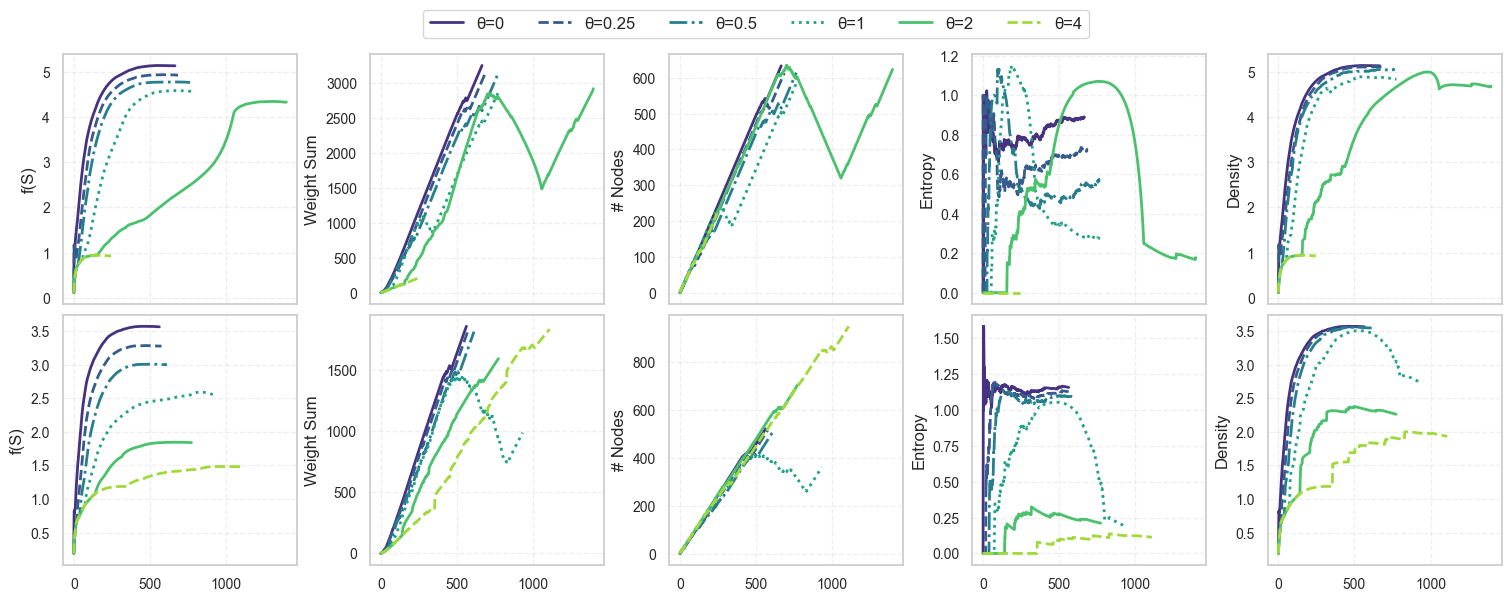

In [6]:
for d in datasets[-2:-1]:
    print(f'==={d}===')
    theta_influence(d, f'output/figs-theta={theta}/theta_influence/{d}.pdf')

In [ ]:
for d in datasets:
    print(f"===Dataset {d}===")
    for theta in [0, 0.25, 0.5, 1, 2, 4]:
        G = get_graph(d)
        total_time, (pos_nodes, neg_nodes) = run_exp(G, 'pads_cpp', dataset=d, theta=theta)

        # compute density of the ECCs
        edge_sum_pos, edge_sum_neg = 0, 0
        for edge in G.edges:
            if G.nodes[edge[0]]['pads_cpp'] == 1 and G.nodes[edge[1]]['pads_cpp'] == 1:
                edge_sum_pos += G.edges[edge]['edge_polarity']
            elif G.nodes[edge[0]]['pads_cpp'] == -1 and G.nodes[edge[1]]['pads_cpp'] == -1:
                edge_sum_neg += G.edges[edge]['edge_polarity']
        density_pos = edge_sum_pos / len(pos_nodes)
        density_neg = edge_sum_neg / len(neg_nodes)

        # compute variance of the ECC nodes
        variance_pos = variance([G.nodes[node]['polarity'] for node in pos_nodes])
        variance_neg = variance([G.nodes[node]['polarity'] for node in neg_nodes])

        # print the results
        print(f"Theta: {theta}, PD: {density_pos}, ND: {density_neg}, PV: {variance_pos}, NV: {variance_neg}")

## Opinions Dynamics

===Dataset Referendum_===
===Dataset Gun===


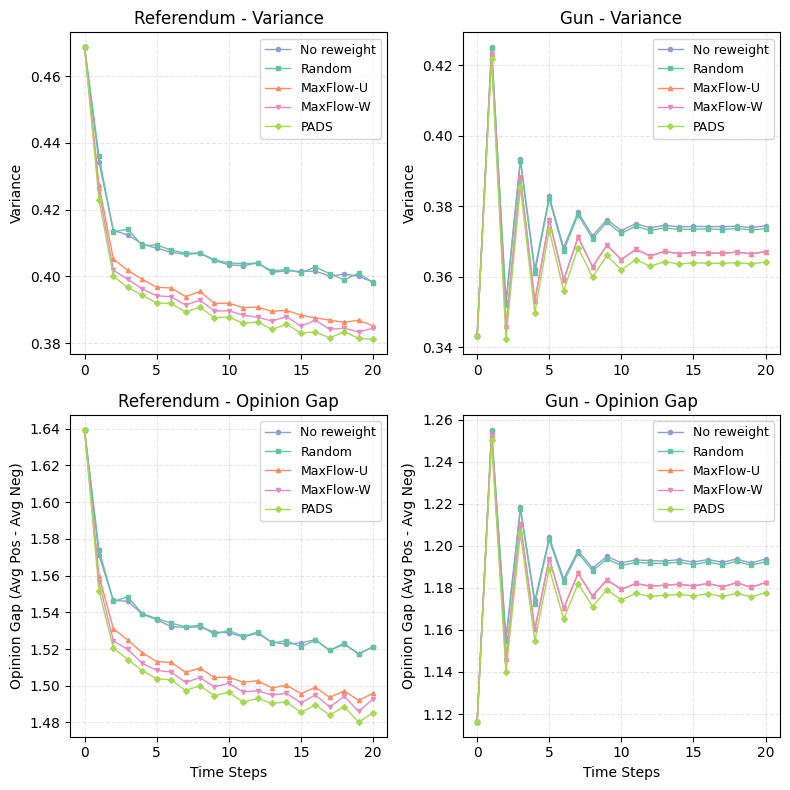

In [ ]:
plot_opinion_dynamics_reweight(datasets=['Election', 'Referendum_'], save_path=f'output/figs-theta={theta}/opinion_dynamics/fj_rg_test.pdf', ratio=0.1)

In [ ]:
plot_opinion_dynamics_connections(datasets=['Referendum_'], save_path='output/figs-theta={theta}/opinion_dynamics/fj_er_connections_test.pdf', ratio=0.1, it=25)

## Diameter \& Polarity

In [ ]:
plot_polarity_distance(datasets, save_path=f'output/figs-theta={theta}/polarity_diameter/polarity_distance.pdf')